In [1]:
import math
import numpy
from matplotlib import pyplot
%matplotlib inline

# Part 1 - Complex Numbers in Python

In [2]:
3 + 2j

(3+2j)

In [3]:
a = 3
b = 3 
z = a+b*1j

In [4]:
print('z = ', z)
print('The type of variable is ', type(z))

z =  (3+3j)
The type of variable is  <class 'complex'>


In [5]:
#Exercises with complex-number operations 

x = (2.75 + 3.69j)*(8.55 - 6.13j)
y = 1.4*numpy.exp(5.32j)
z = (7.51-9.15j)/(4.43 + 9.64j)

print('x = ',x,'y = ',y,'z = ',z)

x =  (46.1322+14.692000000000004j) y =  (0.799270785858-1.1494199454j) z =  (-0.4880897698448308-1.0033441577191493j)


# Part 2- Shapes created by the Joukowski transformation:

In [6]:
def joukowski_transform(z, c):
    xi = z + (c**2 / z)
    return xi

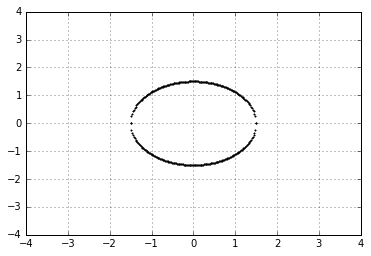

In [7]:
N = 150
x_start, x_end = -4.0, 4.0
y_start, y_end = -4.0, 4.0
x = numpy.linspace(x_start, x_end, N)
y = numpy.linspace(y_start, y_end, N)
X,Y = numpy.meshgrid(x,y)

c = 1.0
r = 1.5
x0, y0 = 0,0

x = numpy.linspace(-r, r, N)
y_circle_pos = numpy.sqrt(r**2 - (x**2))
y_circle_neg = -numpy.sqrt(r**2 - (x**2))

x_circle = numpy.concatenate([x,x])
y_circle = numpy.concatenate([y_circle_pos, y_circle_neg])
xy = numpy.vstack((x_circle, y_circle))
z = numpy.empty_like(xy, dtype=complex)
z.real = xy[0,:]
z.imag = xy[1,:]

pyplot.xlim(x_start, x_end)
pyplot.ylim(y_start, y_end)
#pyplot.scatter(x_circle, y_circle)
#pyplot.scatter(x_circle, y_circle_neg)
#pyplot.scatter(x_circle, y_circle_pos)
pyplot.scatter(z.real, z.imag, s=0.5)

pyplot.grid(True)

#print(x_circle.size)
#print(y_circle.size)

#print(x_circle)
#print(y_circle)

#print(x.size)
#print(y_circle_pos.size)
#print(xy)
#print(z)

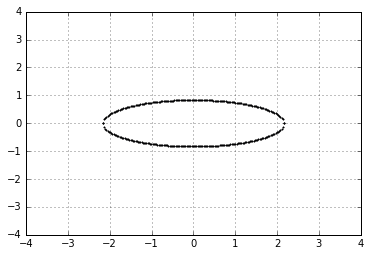

In [8]:
xi = joukowski_transform(z, c)

size=10
pyplot.xlim(x_start, x_end)
pyplot.ylim(y_start, y_end)
pyplot.grid(True)
pyplot.scatter(xi.real, xi.imag, s=0.5)

The shape looks like an ellipse

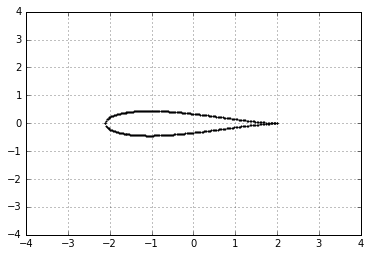

In [9]:
#Radius of the circle = 1.2; centered at xc, yc = c-R, 0

c = 1.0
r = 1.2
x0, y0 = c-r,0

x = numpy.linspace(-r, r, N)+x0
y_circle_pos = numpy.sqrt(r**2 - ((x-x0)**2))
y_circle_neg = -numpy.sqrt(r**2 - ((x-x0)**2))

x_circle = numpy.concatenate([x,x])
y_circle = numpy.concatenate([y_circle_pos, y_circle_neg])
xy = numpy.vstack((x_circle, y_circle))
z = numpy.empty_like(xy, dtype=complex)
z.real = xy[0,:]
z.imag = xy[1,:]

xi = joukowski_transform(z, c)

size=10
pyplot.xlim(x_start, x_end)
pyplot.ylim(y_start, y_end)
pyplot.grid(True)
pyplot.scatter(xi.real, xi.imag, s=0.5)

The shape looks like a symmetric airfoil

/Users/alexabaumer/anaconda3/lib/python3.5/site-packages/ipykernel/__main__.py:8: RuntimeWarning: invalid value encountered in sqrt
/Users/alexabaumer/anaconda3/lib/python3.5/site-packages/ipykernel/__main__.py:9: RuntimeWarning: invalid value encountered in sqrt


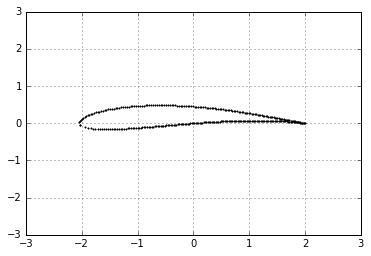

In [135]:
#Circle at xc,yc = 0.1, 0.1 and radius is R = ((c-xc)**2 + yc**2)^0.5

c = 1.0
x0, y0 = 0.1,0.1
r = numpy.sqrt((c-x0)**2 + y0**2)

x = numpy.linspace(-r, r, N)+x0
y_circle_pos = numpy.sqrt(r**2 - ((x-x0)**2))+y0
y_circle_neg = -numpy.sqrt(r**2 - ((x-x0)**2))+y0

x_circle = numpy.concatenate([x,x])
y_circle = numpy.concatenate([y_circle_pos, y_circle_neg])
xy = numpy.vstack((x_circle, y_circle))
z = numpy.empty_like(xy, dtype=complex)
z.real = xy[0,:]
z.imag = xy[1,:]

xi = joukowski_transform(z, c)

size=10
pyplot.xlim(-3, 3)
pyplot.ylim(-3, 3)
pyplot.grid(True)
pyplot.scatter(xi.real, xi.imag, s=0.5)

#print(y_circle_pos)
#print(y_circle_neg)

The shape looks like a cambered airfoil

The point on the circle which corresponds to the trailing edge of the airfoil would be theta = 0

## Part 3 - Grid points on the z plane using polar coordinates

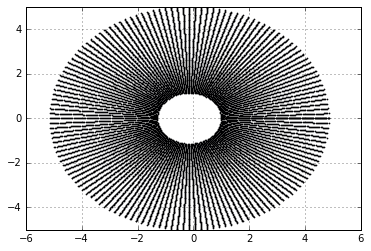

In [11]:
n_r = 100 
n_theta = 145 

R = 1.15
c = 1.0
x0, y0 = -0.15, 0

r = numpy.linspace(R, 5, n_r)
theta = numpy.linspace(0, 2*math.pi, n_theta)
r, theta = numpy.meshgrid(r, theta)
#z = R * numpy.exp(1j*THETA)

xr = (numpy.cos(theta)*r)+x0
yr = (numpy.sin(theta)*r)+y0
z = numpy.empty_like(xr, dtype=complex)
z.real = xr
z.imag = yr

size=10
pyplot.xlim(-6.0, 6.0)
pyplot.ylim(-5.0, 5.0)
pyplot.grid(True)
pyplot.scatter(z.real, z.imag, s=0.5)

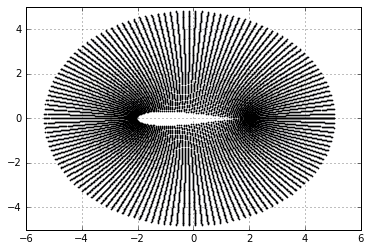

In [12]:
xi = joukowski_transform(z, c)

pyplot.xlim(-6.0, 6.0)
pyplot.ylim(-5.0, 5.0)
pyplot.grid(True)
pyplot.scatter(xi.real, xi.imag, s=0.5)

## Part 4- flow over a symmetric Joukowski airfoil with zero angle of attack

In [13]:
def velocity_doublet(strength, xd, yd, X, Y):

    u_d = -strength/(2*numpy.pi)*((X-xd)**2-(Y-yd)**2)/((X-xd)**2+(Y-yd)**2)**2
    v_d = -strength/(2*numpy.pi)*2*(X-xd)*(Y-yd)/((X-xd)**2+(Y-yd)**2)**2
    
    return u_d,v_d

In [14]:
def streamfx_doublet(strength, xd, yd, X, Y):
 
    psi_d = -strength/(2*numpy.pi)*(Y-yd)/((X-xd)**2+(Y-yd)**2)
    
    return psi_d

In [15]:
def velocity_fs(u_inf, Nx, Ny):
    
    u_fs = u_inf * numpy.ones((Nx, Ny), dtype=float)
    v_fs = u_inf * 0 * numpy.ones((Nx, Ny), dtype=float)
    
    return u_fs, v_fs

In [16]:
def streamfx_fs(u_inf, Y):
    
    psi_fs = u_inf * Y
    
    return psi_fs

In [17]:
u_inf = 1.0 
strength_d = (R**2)*2*numpy.pi*u_inf
print('The strength of the doublet is: ',strength_d)

u_d, v_d = velocity_doublet(strength_d, x0, y0, xr, yr)
psi_d = streamfx_doublet(strength_d, x0, y0, xr, yr)

u_fs, v_fs = velocity_fs(u_inf, n_theta, n_r)
psi_fs = streamfx_fs(u_inf, n_theta)

u = u_d + u_fs
v = v_d + v_fs
psi = psi_d + psi_fs

The strength of the doublet is:  8.309512568745001


In [137]:
#z plane
z = xr + 1j*yr
uz = numpy.empty_like(xr, dtype=complex)
uz = u - 1j*v
print(uz.shape)

dXi_dz = 1 - ((c/z)**2)
print(dXi_dz.shape)

#Xi plane

W_xi = uz / dXi_dz
#print(W_xi)
#print(W_xi.shape)

u_xi = W_xi.real
v_xi = -W_xi.imag
#print(u_xi.shape)
#print(v_xi.shape)

(145, 100)
(145, 100)


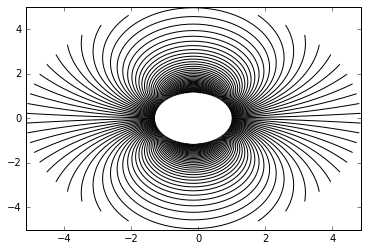

In [19]:
pyplot.contour(xr, yr, psi, colors='k', linestyles='solid', levels=numpy.linspace(numpy.min(psi),numpy.max(psi), 100))

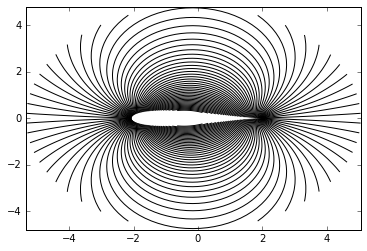

In [20]:
pyplot.contour(xi.real, xi.imag, psi, colors='k', linestyles='solid', levels=numpy.linspace(numpy.min(psi),numpy.max(psi), 100))

(-3, 3)

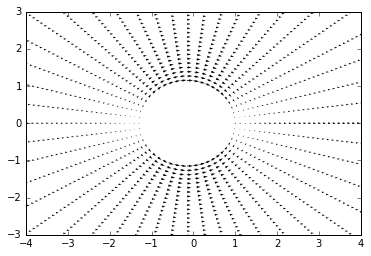

In [21]:
pyplot.quiver(xr[::3,::3], yr[::3,::3], u[::3,::3], v[::3,::3], units='inches', scale=25.0)
#pyplot.quiver(xr, yr, u, v, units='inches', scale=100.0)
pyplot.xlim(-4,4)
pyplot.ylim(-3,3)

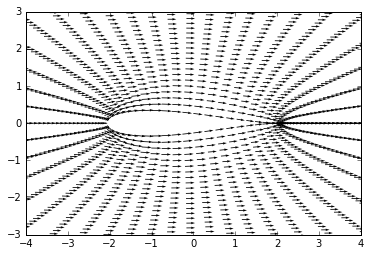

In [22]:
pyplot.xlim(-4,4)
pyplot.ylim(-3,3)
pyplot.quiver(xi.real[::3,::3], xi.imag[::3,::3], u_xi[::3,::3], v_xi[::3,::3], scale=40.0)

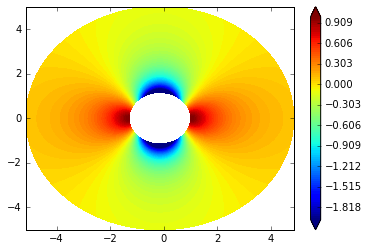

In [23]:
#pressure coefficient 

c_p = 1.0 - (u**2 + v**2)/u_inf**2
c_p2 = 1.0 - (u_xi**2 + v_xi**2)/u_inf**2


contf = pyplot.contourf(xr, yr, c_p, levels = numpy.linspace(-2,1,100), extend='both')
cbar = pyplot.colorbar(contf)

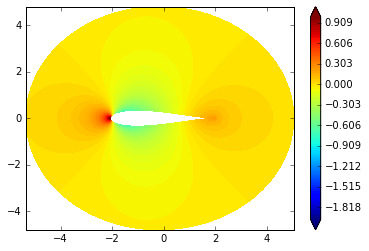

In [24]:
contf = pyplot.contourf(xi.real, xi.imag, c_p2, levels = numpy.linspace(-2,1,100), extend='both')
cbar = pyplot.colorbar(contf)

In [25]:
#Velocity at the 62nd point on the airfoil surface
vel_u_62 = u_xi[61,0]
vel_v_62 = v_xi[61,0]

print((vel_u_62),(vel_v_62))

#Minimum value of the pressure coefficient on the airfoil surface

min_cp = numpy.min(c_p2)
print('The minimum pressure coefficient is: {}'.format(min_cp))

1.10633846629 0.523633349298
The minimum pressure coefficient is: -0.6877556740924042


## Part 5 - Flow over a symmetric Joukowski airfoil with non-zero angle of attack, without circulation

In [26]:
alpha = 20.0 * 2 * numpy.pi / 360
zl = (z - (x0+1j*y0))*numpy.exp(-1j*alpha)
xl = zl.real
yl = zl.imag
x0, y0 = 0.0, 0.0

In [27]:
def doublet(u_inf, strength, xd, yd, X, Y):

    u_d = -strength/(2*numpy.pi)*((X-xd)**2-(Y-yd)**2)/((X-xd)**2+(Y-yd)**2)**2
    v_d = -strength/(2*numpy.pi)*2*(X-xd)*(Y-yd)/((X-xd)**2+(Y-yd)**2)**2
    
    psi_d = -strength/(2*math.pi)*(Y-yd)/((X-xd)**2+(Y-yd)**2)

    return u_d,v_d, psi_d

In [111]:
def fs(u_inf, X, Y, Nx, Ny, alpha):
    
    u_fs = u_inf * numpy.ones((Nx, Ny), dtype=float) * numpy.cos(0)
    v_fs = u_inf * numpy.ones((Nx, Ny), dtype=float) * numpy.sin(0)

    psi_fs = u_inf * (Y*numpy.cos(alpha) - X*numpy.sin(alpha))
    
    return u_fs, v_fs, psi_fs

In [112]:
u_inf = 1.0 
strength_d = (R**2)*2*numpy.pi*u_inf

u_d2, v_d2, psi_d2 = doublet(u_inf, strength_d, x0, y0, xl, yl)

u_fs2, v_fs2, psi_fs2 = fs(u_inf, xl, yl, n_theta, n_r, alpha)

u2 = u_d2 + u_fs2
v2 = v_d2 + v_fs2
psi2 = psi_d2 + psi_fs2

In [113]:
uz2 = numpy.empty_like(xl , dtype=complex)
uz2 = u2 - 1j*v2
dXi_dz2 = 1 - ((c/z)**2)

#rotate velocity vectors back to z plane
Uz = uz2 * numpy.exp(-1j*alpha)

#change velocity vectors to Xi plane
Wxi2 = Uz / dXi_dz2

uz_x = Uz.real
uz_y = -Uz.imag

u_wxi = Wxi2.real
v_wxi = -Wxi2.imag

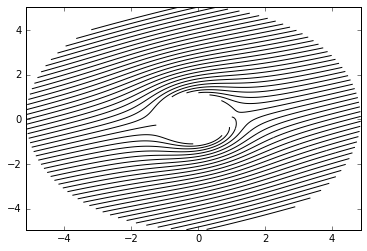

In [114]:
pyplot.contour(xl, yl, psi2, colors='k', linestyles='solid', levels=numpy.linspace(numpy.min(psi2),numpy.max(psi2), 50))

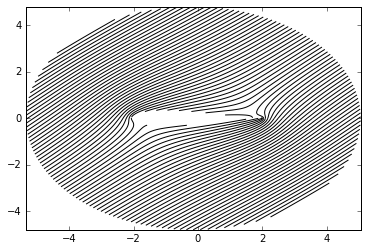

In [115]:
pyplot.contour(xi.real, xi.imag, psi2, colors='k', linestyles='solid', levels=numpy.linspace(numpy.min(psi2),numpy.max(psi2), 75))

(-3, 3)

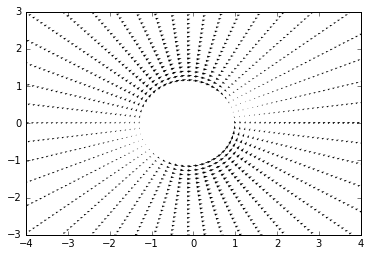

In [116]:
pyplot.quiver(xr[::3,::3], yr[::3,::3], uz_x[::3,::3], uz_y[::3,::3], units='inches', scale=25.0)
#pyplot.quiver(xr, yr, u, v, units='inches', scale=100.0)
pyplot.xlim(-4,4)
pyplot.ylim(-3,3)

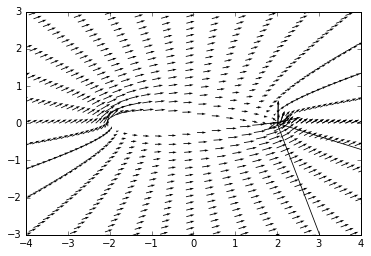

In [117]:
pyplot.xlim(-4,4)
pyplot.ylim(-3,3)
pyplot.quiver(xi.real[::4,::4], xi.imag[::4,::4], u_wxi[::4,::4], v_wxi[::4,::4], scale=40.0)

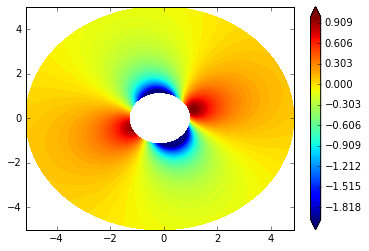

In [118]:
#pressure coefficient 

c_pl = 1.0 - (uz_x**2 + uz_y**2)/u_inf**2
c_pl2 = 1.0 - (u_wxi**2 + v_wxi**2)/u_inf**2

contf = pyplot.contourf(xr, yr, c_pl, levels = numpy.linspace(-2,1,100), extend='both')
cbar = pyplot.colorbar(contf)

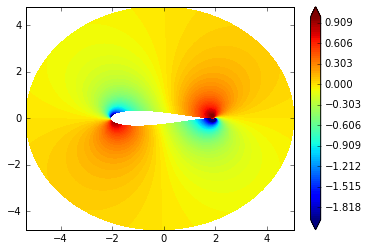

In [119]:
contf = pyplot.contourf(xi.real, xi.imag, c_pl2, levels = numpy.linspace(-2,1,100), extend='both')
cbar = pyplot.colorbar(contf)

In [120]:
#Stagnation points on the airfoil 
vel_surf = numpy.sqrt(u_wxi[:,0]**2 + v_wxi[:,0]**2)
stags = numpy.where((numpy.round(vel_surf))==0.0)
print(stags)
#just guessed to get the answer here -- not correct 

#there is no lift or drag on this airfoil

#Velocity at the 50th point on the airfoil surface
vel_u_50 = u_wxi[49,0]
vel_v_50 = v_wxi[49,0]
print((vel_u_50),(vel_v_50))

#Pressure coefficient on the 75th point on the airfoil surface
cp_75 = c_pl2[74,0]
print(cp_75)

(array([ 7,  8,  9, 10, 79, 80, 81, 82, 83, 84, 85, 86, 87]),)
1.33351332131 0.188271375493
-0.512647327934


## Part 6- Flow over a symmetric Joukowski airfoil with non-zero angle of attack, with circulation

In [121]:
def vortex(strength, xv, yv, X, Y):
    
    u = + strength/(2*math.pi)*(Y-yv)/((X-xv)**2+(Y-yv)**2)
    v = - strength/(2*math.pi)*(X-xv)/((X-xv)**2+(Y-yv)**2)
    
    psi = strength/(4*math.pi)*numpy.log((X-xv)**2+(Y-yv)**2)

    return u, v, psi

In [122]:
alpha = 20.0 * 2 * numpy.pi / 360
x0, y0 = 0.0, 0.0

zl = (z - (x0+1j*y0))*numpy.exp(-1j*alpha)
xl = zl.real
yl = zl.imag

strength_v = -numpy.sin(-alpha)*4*numpy.pi*R

In [123]:
u_inf = 1.0 

u_do, v_do, psi_do = doublet(u_inf, strength_d, x0, y0, xl, yl)

u_fr, v_fr, psi_fr = fs(u_inf, xl, yl, n_theta, n_r, alpha)

u_v, v_v, psi_v = vortex(strength_v, x0, y0, xl, yl)

u6 = u_do + u_fr + u_v
v6 = v_do + v_fr + v_v
psi6 = psi_do + psi_fr + psi_v

In [124]:
#z prime plane
uz6 = numpy.empty_like(xl, dtype=complex)
uz6 = u6 - (1j*v6)

dXi_dz6 = 1 - ((c/zl)**2)

#rotate velocity vectors back to z plane
Uz6 = uz6 * numpy.exp(-1j*alpha)

#obtain velocity on the xi plane
WXi6 = Uz6 / dXi_dz6

uz6 = Uz6.real
vz6 = -Uz6.imag

uwxi6 = WXi6.real
vwxi6 = -WXi6.imag

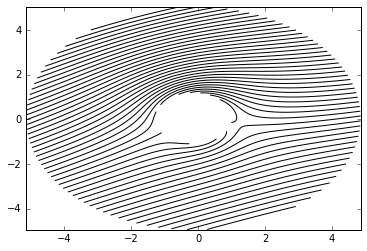

In [125]:
pyplot.contour(xl, yl, psi6, colors='k', linestyles='solid', levels=numpy.linspace(numpy.min(psi6),numpy.max(psi6), 50))

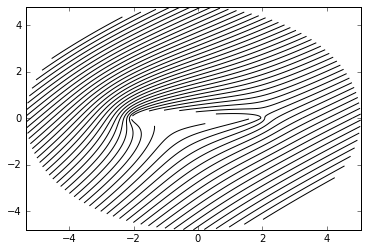

In [126]:
pyplot.contour(xi.real, xi.imag, psi6, colors='k', linestyles='solid', levels=numpy.linspace(numpy.min(psi6),numpy.max(psi6), 50))

(-3, 3)

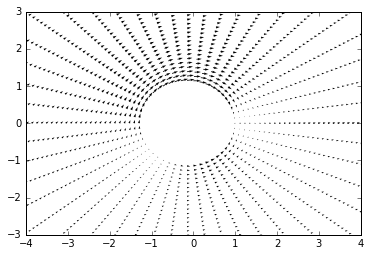

In [127]:
pyplot.quiver(xr[::3,::3], yr[::3,::3], uz6[::3,::3], vz6[::3,::3], units='inches', scale=25.0)
#pyplot.quiver(xr, yr, u, v, units='inches', scale=100.0)
pyplot.xlim(-4,4)
pyplot.ylim(-3,3)

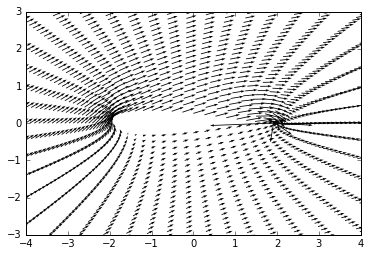

In [133]:
pyplot.xlim(-4,4)
pyplot.ylim(-3,3)
pyplot.quiver(xi.real[::3,::3], xi.imag[::3,::3], uwxi6[::3,::3], vwxi6[::3,::3], scale=40.0)

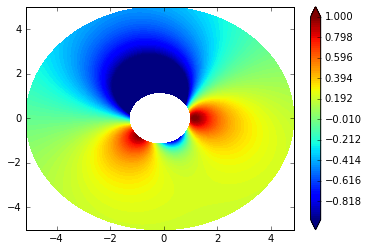

In [129]:
#pressure coefficient 

c_pl = 1.0 - (uz6**2 + vz6**2)/u_inf**2
c_pl2 = 1.0 - (uwxi6**2 + vwxi6**2)/u_inf**2

contf = pyplot.contourf(xr, yr, c_pl, levels = numpy.linspace(-1,1,100), extend='both')
cbar = pyplot.colorbar(contf)

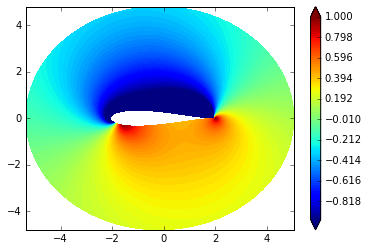

In [130]:
contf = pyplot.contourf(xi.real, xi.imag, c_pl2, levels = numpy.linspace(-1,1,100), extend='both')
cbar = pyplot.colorbar(contf)

In [131]:
#Strength of the vortex
print('The strength of the vortex is: ',strength_v)

#Lift calculation 
lift = u_inf * strength_v * numpy.cos(alpha)
print('The lift is: ',lift)

#Lift and drag calculation- direct
#lift =  
#drag = 

#Stagnation points on the airfoil 
vel_surf2 = numpy.sqrt(uwxi6[:,0]**2 + vwxi6[:,0]**2)
stags2 = numpy.where(numpy.abs(numpy.round(vel_surf2))==0)
print(stags2)
#print(vel_surf2)

#Velocity at the 92nd point on the airfoil surface
vel_u_92 = uwxi6[92,0]
vel_v_92 = vwxi6[92,0]
print((vel_u_92),(vel_v_92))
print(vel_v_92)
#also this is the incorrect method to get this...

#Pressure coefficient on the 111th point on the airfoil surface
cp_110 = c_pl2[110,0]
print(cp_110)

The strength of the vortex is:  4.9426446604
The lift is:  4.64456671454
(array([  0,  88,  89,  90,  91,  92,  93,  94,  95,  96,  97, 140, 141,
       142, 143, 144]),)
0.205557187921 0.166994662778
0.166994662778
0.486706651507
